<style>
    .output {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
<center>
    <h1> INF390 - Análisis Inteligente de Datos </h1>
    <h1> Tarea 2 - Machine Learning con Python </h1>
    <h3>
        <table style="border: 0px;">
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> Sebastián Aedo</td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; border: 0px;"> Diego Córdova </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> 201573057-1 </td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; border: 0px;"> 2014xxxxx-9 </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; font-size: 14px; border: 0px;"> <code>sebastian.aedo@sansano.usm.cl </code></td>
                <td style="text-align: center; border: 0px; padding-right: 50px;"> </td>
                <td style="text-align: center; font-size: 14px; border: 0px;"><code>diego.cordova@sansano.usm.cl</code> </td>
            </tr>
        </table>
    </h3> 
    <h4> Valparaíso, Viernes 8 de Diciembre de 2017 </h4>
</center>

## Tabla de contenidos

* [Clustering](#1.-Clustering)
    * [Hepatitis](#Hepatitis)
    * [Diabetes](#Diabetes)

In [1]:
import numpy as np
import time

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score      
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split

from sklearn import cluster # Técnica de Clustering
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics


from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pcasvd

import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Diabetes Dataset

vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

# 1. Clustering

A continuación se aplicarán tres técnicas de clustering a los tres dataset presentados. Las tres técnicas a utilizar serán

1. Average Linkage
2. K-Means
3. Ward

Luego de aplicar cada algoritmo, se hará una breve comparación entre todos los métodos.

## Hepatitis

A continuación se analizará el dataset de la hepatitis.

Dentro de este dataset se presentan principalmente valores booleanos, 
y la bilirrubina que parece ser una variable contínua, sin embargo,
en la descripción del dataset describen que es un valor **con lazos**, por lo que se podía 
**discretizar**. El objetivo de esta clasificación será intentar predecir la clase a partir
de los otros parámetros.

In [3]:
vector = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", 
          "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
          "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
          "PROTIME", "HISTOLOGY"]
hepatitis = read_csv('data/hepatitis.data', sep=',', names=vector, header=None)

In [4]:
hepatitis.info()
hepatitis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
AGE                155 non-null int64
SEX                155 non-null int64
STEROID            155 non-null object
ANTIVIRALS         155 non-null int64
FATIGUE            155 non-null object
MALAISE            155 non-null object
ANOREXIA           155 non-null object
LIVER BIG          155 non-null object
LIVER FIRM         155 non-null object
SPLEEN PALPABLE    155 non-null object
SPIDERS            155 non-null object
ASCITES            155 non-null object
VARICES            155 non-null object
BILIRUBIN          155 non-null object
ALK PHOSPHATE      155 non-null object
SGOT               155 non-null object
ALBUMIN            155 non-null object
PROTIME            155 non-null object
HISTOLOGY          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


### Preparando el dataset

Se puede notar que los valores están como `1`, `2` ó `?`. Para manejarlo con mayor facilidad, se reemplazarán por `True`, `False` o `None` según corresponda.

In [5]:
boolean_columns = ["STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
     "SPIDERS", "ASCITES", "VARICES", 'HISTOLOGY']
for column in boolean_columns:
    type_data = {'1': False, '2': True, '?': None}
    hepatitis[column] = hepatitis[column].apply(lambda x: type_data[str(x)])

El Sexo se tratará como `M` ó `F`.

In [6]:
type_data = {'1': 'M', '2': 'F', '?': np.nan}
hepatitis['SEX'] = hepatitis['SEX'].apply(lambda x: type_data[str(x)])

In [7]:
type_data = {'1': 'Dead', '2': 'Alive', '?': None}
hepatitis['Class'] = hepatitis['Class'].apply(lambda x: type_data[str(x)])

Ahora se modificarán las otras variables reemplazando el `?` por `None`.

In [8]:
floats = ['BILIRUBIN', 'ALBUMIN']
integers = ['ALK PHOSPHATE', 'SGOT', 'PROTIME']

for column in floats:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')
    
for column in integers:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')

Luego, se procede a entrenar el clustering usando las variables contínuas

In [9]:
non_boolean = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']

In [10]:
# Esta función es un wrapper para obtener las métricas (y no tener que reescribir codigo)
def get_metrics(f):
    def function_wrapper(*args):
        X, labels_true, labels = f(*args)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        silhouette = metrics.silhouette_score(X, labels)
        if len(args) >= 3 and args[2]:
            print('Estimated number of clusters: %d' % n_clusters_)
            print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
            print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
            print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
            print("Adjusted Rand Index: %0.6f"
                  % metrics.adjusted_rand_score(labels_true, labels))
            print("Adjusted Mutual Information: %0.6f"
                  % metrics.adjusted_mutual_info_score(labels_true, labels))
        
            print("Silhouette Coefficient: %0.6f"
                  % silhouette)
    
        return (labels, silhouette)
    return function_wrapper

In [11]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=False):
    X = hepatitis.loc[:, cols].dropna()
    y = hepatitis.loc[X.index,'Class']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)


## Aplicando Clustering

### Average Linkage

A continuación se probará la técnica *Average Linkage* para encontrar clusters.

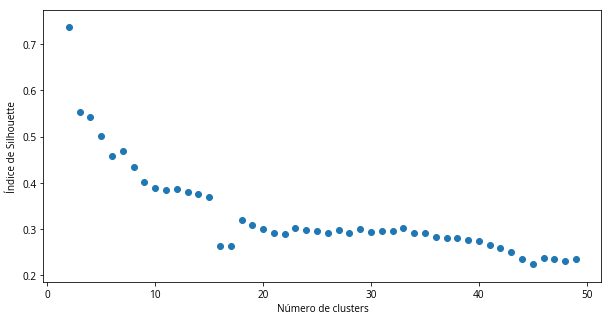

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [13]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.735540


En el caso de Average Linkage, 
se puede apreciar que el mejor cluster es cuando $K = 2$, lo que es normal ya que existen 2 clases.

###  K–Means

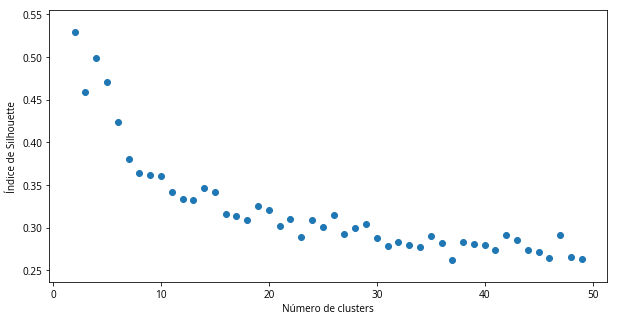

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [15]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.529638


### WARD

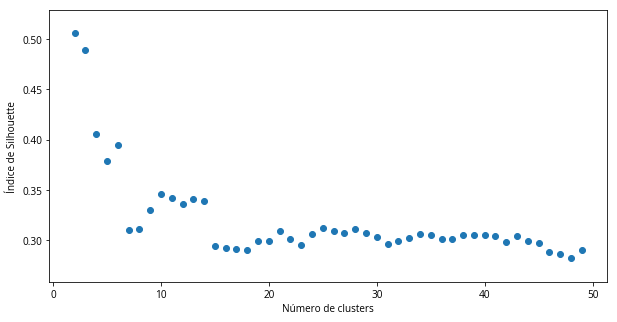

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(non_boolean, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [17]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.505554


### Comparando

In [18]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.735540 | 0.529638 | 0.505554 |
| 3 | 0.552282 | 0.458757 | 0.489319 |
| 4 | 0.542588 | 0.499024 | 0.405756 |
| 5 | 0.500554 | 0.470372 | 0.379138 |
| 6 | 0.458941 | 0.423490 | 0.395077 |
| 7 | 0.467717 | 0.380528 | 0.310251 |
| 8 | 0.434895 | 0.364317 | 0.311481 |
| 9 | 0.401220 | 0.362078 | 0.330160 |
| 10 | 0.389410 | 0.360019 | 0.345831 |
| 11 | 0.383925 | 0.341685 | 0.342085 |
| 12 | 0.386522 | 0.333600 | 0.336303 |
| 13 | 0.380419 | 0.332316 | 0.340655 |
| 14 | 0.376705 | 0.347003 | 0.338613 |
| 15 | 0.369445 | 0.341400 | 0.293790 |
| 16 | 0.262980 | 0.315663 | 0.292779 |
| 17 | 0.263868 | 0.314035 | 0.291187 |
| 18 | 0.319005 | 0.309273 | 0.290198 |
| 19 | 0.308576 | 0.324860 | 0.299691 |
| 20 | 0.299658 | 0.320378 | 0.299558 |
| 21 | 0.292595 | 0.301435 | 0.309292 |
| 22 | 0.289598 | 0.309901 | 0.301521 |
| 23 | 0.302986 | 0.289566 | 0.295761 |
| 24 | 0.298271 | 0.309122 | 0.305941 |
| 25 | 0.296928 | 0.300660 | 0.312444 |
| 26 | 0.292387 | 0.314503 | 0.309242 |
| 27 | 0.298135 | 0.292529 | 0.307589 |
| 28 | 0.292078 | 0.299418 | 0.311492 |
| 29 | 0.300744 | 0.304190 | 0.307379 |
| 30 | 0.294853 | 0.288301 | 0.303222 |
| 31 | 0.296044 | 0.277972 | 0.296607 |
| 32 | 0.295073 | 0.283496 | 0.299108 |
| 33 | 0.301919 | 0.279314 | 0.302082 |
| 34 | 0.290904 | 0.277074 | 0.306070 |
| 35 | 0.290671 | 0.290433 | 0.305560 |
| 36 | 0.283590 | 0.281946 | 0.300845 |
| 37 | 0.279897 | 0.262017 | 0.301435 |
| 38 | 0.281501 | 0.283341 | 0.304823 |
| 39 | 0.277313 | 0.281074 | 0.305568 |
| 40 | 0.275500 | 0.279826 | 0.305098 |
| 41 | 0.265376 | 0.273568 | 0.304127 |
| 42 | 0.259532 | 0.290917 | 0.298498 |
| 43 | 0.249704 | 0.285312 | 0.304560 |
| 44 | 0.235147 | 0.273694 | 0.299414 |
| 45 | 0.224045 | 0.271291 | 0.297374 |
| 46 | 0.237424 | 0.264196 | 0.287828 |
| 47 | 0.235088 | 0.291630 | 0.286357 |
| 48 | 0.230411 | 0.265134 | 0.282009 |
| 49 | 0.236032 | 0.262798 | 0.290707 |



Como se puede apreciar en la tabla anterior, la que tuvo peor perfomance fue Ward, y la que mejor rindió en este caso fue Average Linkage.

## Diabetes

In [19]:
# Diabetes Dataset
vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

In [20]:
diabetes.info()
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
TP         768 non-null int64
glucose    768 non-null int64
DBP        768 non-null int64
TSFT       768 non-null int64
insulin    768 non-null int64
mass       768 non-null float64
DPF        768 non-null float64
age        768 non-null int64
status     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,TP,glucose,DBP,TSFT,insulin,mass,DPF,age,status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En el caso de este dataset, las variables 0 no tienen sentido, por lo que serán reemplazadas por `NaN` ya que no contribuyen con la información.

In [21]:
diabetes.replace(0, np.nan);
valid_cols = diabetes.loc[:, :'age'].columns

In [22]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=False):
    X = diabetes.loc[:, cols].dropna()
    y = diabetes.loc[X.index,'status']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

### Average Linkage

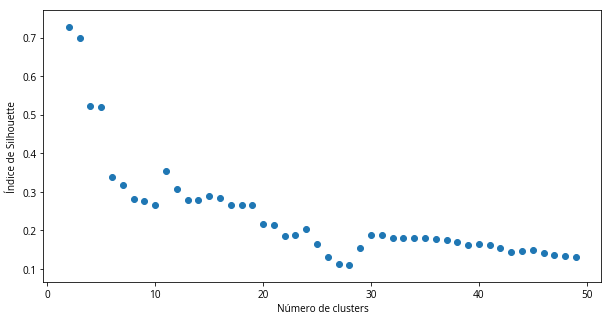

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [24]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.728518


### K-Means

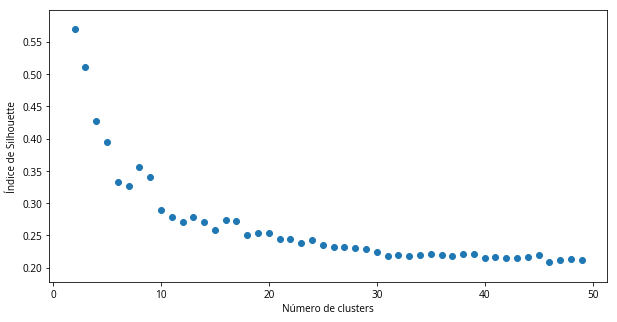

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [26]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.568790


### Ward

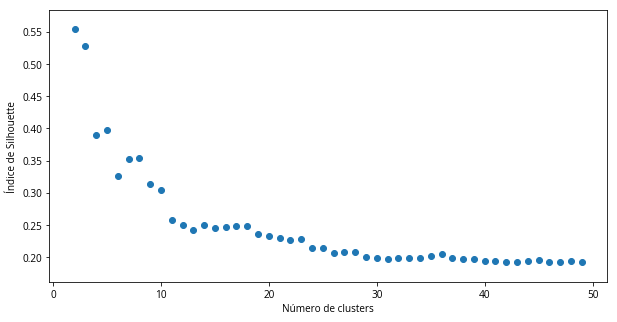

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [28]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.553268


In [29]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.728518 | 0.568790 | 0.553268 |
| 3 | 0.698332 | 0.510429 | 0.528168 |
| 4 | 0.521997 | 0.427749 | 0.390355 |
| 5 | 0.519924 | 0.395379 | 0.397419 |
| 6 | 0.337600 | 0.333512 | 0.326127 |
| 7 | 0.316816 | 0.327141 | 0.352505 |
| 8 | 0.281910 | 0.355863 | 0.353754 |
| 9 | 0.277235 | 0.339793 | 0.313881 |
| 10 | 0.267134 | 0.289666 | 0.304674 |
| 11 | 0.354457 | 0.277948 | 0.258141 |
| 12 | 0.306753 | 0.271470 | 0.249478 |
| 13 | 0.279532 | 0.278285 | 0.242061 |
| 14 | 0.278861 | 0.271152 | 0.249817 |
| 15 | 0.288832 | 0.258474 | 0.246032 |
| 16 | 0.284193 | 0.274532 | 0.246212 |
| 17 | 0.265398 | 0.271854 | 0.248238 |
| 18 | 0.266424 | 0.250464 | 0.248722 |
| 19 | 0.265998 | 0.253690 | 0.236124 |
| 20 | 0.216395 | 0.254586 | 0.233639 |
| 21 | 0.214531 | 0.245290 | 0.229606 |
| 22 | 0.185472 | 0.245060 | 0.227112 |
| 23 | 0.189159 | 0.238154 | 0.228286 |
| 24 | 0.204825 | 0.242414 | 0.214471 |
| 25 | 0.163862 | 0.235573 | 0.214833 |
| 26 | 0.130115 | 0.231471 | 0.207351 |
| 27 | 0.113307 | 0.232646 | 0.207888 |
| 28 | 0.109924 | 0.229887 | 0.207482 |
| 29 | 0.154562 | 0.228855 | 0.200195 |
| 30 | 0.188942 | 0.225183 | 0.198529 |
| 31 | 0.188567 | 0.218088 | 0.197095 |
| 32 | 0.181717 | 0.220189 | 0.198740 |
| 33 | 0.180367 | 0.218746 | 0.199380 |
| 34 | 0.181092 | 0.220518 | 0.199573 |
| 35 | 0.179153 | 0.221432 | 0.202576 |
| 36 | 0.177607 | 0.219800 | 0.204413 |
| 37 | 0.175253 | 0.218030 | 0.199484 |
| 38 | 0.169257 | 0.221323 | 0.197642 |
| 39 | 0.162884 | 0.220633 | 0.197404 |
| 40 | 0.163803 | 0.215334 | 0.194550 |
| 41 | 0.162906 | 0.217438 | 0.193809 |
| 42 | 0.154994 | 0.214675 | 0.192664 |
| 43 | 0.144208 | 0.215138 | 0.192657 |
| 44 | 0.145591 | 0.216160 | 0.194652 |
| 45 | 0.150453 | 0.219566 | 0.194988 |
| 46 | 0.141353 | 0.208478 | 0.192130 |
| 47 | 0.136651 | 0.211318 | 0.192863 |
| 48 | 0.132637 | 0.213321 | 0.193537 |
| 49 | 0.132439 | 0.212791 | 0.192420 |



## Water Treatment

En [este enlace](http://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.names)
se muestran cuales son las clases de este dataset. Son un total de 13 clases en un formato
no muy amigable, es por esto que sólo se trabajará para identificar la clase 9, la cuál es descrita como

>Class 9: Normal situation with low influent

Se decide clasificar según esto porque es uno de los problemas con más días.

In [30]:
header = ['DATE', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P',
'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G',
'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

water = pd.read_csv('data/water-treatment.data', header=None)
water.columns = header

In [31]:
water.info()
water.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
DATE        527 non-null object
Q-E         527 non-null object
ZN-E        527 non-null object
PH-E        527 non-null float64
DBO-E       527 non-null object
DQO-E       527 non-null object
SS-E        527 non-null object
SSV-E       527 non-null object
SED-E       527 non-null object
COND-E      527 non-null int64
PH-P        527 non-null float64
DBO-P       527 non-null object
SS-P        527 non-null int64
SSV-P       527 non-null object
SED-P       527 non-null object
COND-P      527 non-null int64
PH-D        527 non-null float64
DBO-D       527 non-null object
DQO-D       527 non-null object
SS-D        527 non-null object
SSV-D       527 non-null object
SED-D       527 non-null object
COND-D      527 non-null int64
PH-S        527 non-null object
DBO-S       527 non-null object
DQO-S       527 non-null object
SS-S        527 non-null object
SSV-S       527 non-null object


,DATE,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


Aquí se agregará la clase de la columna a los días previamente mencionados

In [32]:
# 0 - Normal
# 1 - Secondary settler problems-1
# 2 - Secondary settler problems-2
# 3 - Secondary settler problems-3
# 4 - Solid Overload
# 5 - Secondary settler problems-4

days_affected = [
    "D-8/8/90", "D-9/8/90", "D-10/8/90", "D-13/8/90", "D-15/8/90", "D-19/8/90", "D-20/8/90", "D-27/8/90", "D-1/11/90", 
"D-4/11/90", "D-11/11/90", "D-19/11/90", "D-7/10/90", "D-8/10/90", "D-9/10/90", "D-12/10/90", "D-13/10/90", "D-14/10/90", "D-15/10/90", "D-16/10/90", "D-17/10/90",
"D-21/10/90", "D-23/10/90", "D-26/10/90", "D-28/10/90", "D-7/3/91", "D-24/3/91", "D-25/3/91",
"D-1/5/91", "D-5/5/91", "D-8/5/91", "D-9/5/91", "D-12/5/91", "D-13/5/91", "D-26/5/91", "D-27/5/91",
"D-26/4/91", "D-28/4/91", "D-29/4/91", "D-2/7/91", "D-14/7/91", "D-29/7/91", "D-9/6/91", "D-24/6/91",
"D-1/10/91", "D-3/10/91", "D-5/10/91", "D-12/10/91", "D-15/10/91", "D-4/8/91", 
"D-9/8/91", "D-10/8/91", "D-11/8/91", "D-12/8/91", "D-13/8/91", "D-14/8/91", "D-15/8/91", "D-16/8/91",
"D-17/8/91", "D-18/8/91", "D-19/8/91", "D-20/8/91", "D-21/8/91", "D-22/8/91", "D-23/8/91", "D-24/8/91",
"D-25/8/91", "D-26/8/91", "D-28/8/91", "D-30/8/91"
]

water['problem'] = 0
for day in days_affected:
    water.loc[water['DATE'] == day,'problem'] = 1

In [33]:
for col in water.loc[:,'Q-E':].columns:
    water[col] = pd.to_numeric(water[col], errors='coerse')

In [34]:
water.columns

Index(['DATE', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G', 'problem'],
      dtype='object')

In [35]:
valid_cols = list(water.loc[:, 'Q-E':'RD-SED-G'].columns)

In [36]:
@get_metrics
def test_algorithm(cols, algoritmo, metrics=False, scaled=False):
    X = water.loc[:, cols].dropna()
    y = water.loc[X.index,'problem']
    if scaled:
        X = StandardScaler().fit_transform(X)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    if metrics:
        print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

### Average Linkage

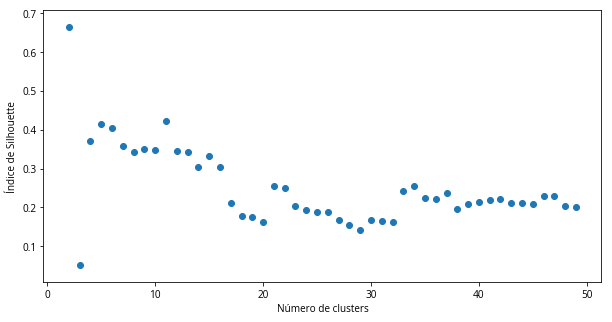

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

average_linkage_silhouette = []

for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                            affinity="cityblock", n_clusters=n)
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    
    average_linkage_silhouette.append(silhouette)
    
best_case = average_linkage_silhouette.index(max(average_linkage_silhouette))
ax.scatter(range(2, 50), average_linkage_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [38]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, average_linkage_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.664851


### K-Means

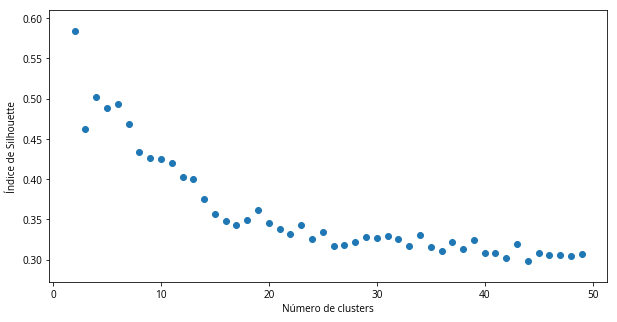

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

kmeans_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.KMeans(n_clusters=n)
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    kmeans_silhouette.append(silhouette)

best_case = kmeans_silhouette.index(max(kmeans_silhouette))
ax.scatter(range(2, 50), kmeans_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [40]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, kmeans_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.583614


### Ward

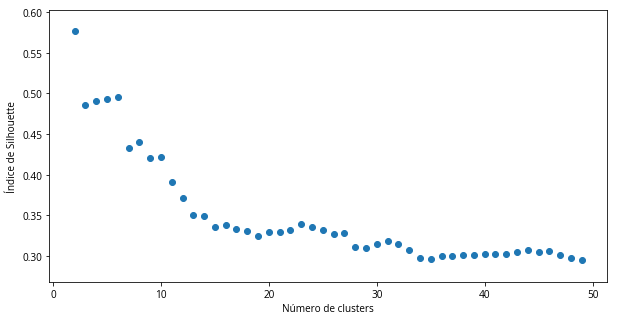

In [41]:
fig, ax = plt.subplots(figsize=(10,5))

ward_silhouette = []
for n in range(2, 50):
    algoritmo = cluster.AgglomerativeClustering(n_clusters=n, linkage='ward')
    
    y_pred, silhouette = test_algorithm(valid_cols, algoritmo, False)
    ward_silhouette.append(silhouette)
    
best_case = ward_silhouette.index(max(ward_silhouette))
ax.scatter(range(2, 50), ward_silhouette)
ax.set_ylabel("Índice de Silhouette")
ax.set_xlabel("Número de clusters");

In [42]:
print("Índice de silhouette con %d clusters: %f" % (best_case+2, ward_silhouette[best_case]))

Índice de silhouette con 2 clusters: 0.576421


In [43]:
from IPython.display import display, Markdown, Latex

to_print = "| K | Average Linkage | K Means | Ward|\n"
to_print += "|--:|----------------:|--------:|----:|\n"
for i in range(len(ward_silhouette)):
    to_print += "| %d | %f | %f | %f |\n" % (i+2, average_linkage_silhouette[i], 
                                             kmeans_silhouette[i], ward_silhouette[i])
to_print += "\n"
display(Markdown(to_print))

| K | Average Linkage | K Means | Ward|
|--:|----------------:|--------:|----:|
| 2 | 0.664851 | 0.583614 | 0.576421 |
| 3 | 0.051654 | 0.462625 | 0.485379 |
| 4 | 0.370008 | 0.502316 | 0.491370 |
| 5 | 0.413427 | 0.488926 | 0.493763 |
| 6 | 0.403917 | 0.493833 | 0.495139 |
| 7 | 0.357238 | 0.468226 | 0.432903 |
| 8 | 0.342937 | 0.433699 | 0.440951 |
| 9 | 0.351005 | 0.426098 | 0.421052 |
| 10 | 0.347043 | 0.425398 | 0.422407 |
| 11 | 0.423488 | 0.419621 | 0.391021 |
| 12 | 0.345565 | 0.402097 | 0.371676 |
| 13 | 0.342311 | 0.400165 | 0.350397 |
| 14 | 0.303433 | 0.375912 | 0.349051 |
| 15 | 0.333347 | 0.356530 | 0.335231 |
| 16 | 0.304765 | 0.347628 | 0.338717 |
| 17 | 0.212357 | 0.343723 | 0.333809 |
| 18 | 0.178226 | 0.349119 | 0.330431 |
| 19 | 0.174870 | 0.361244 | 0.324951 |
| 20 | 0.163849 | 0.345117 | 0.329375 |
| 21 | 0.255241 | 0.338195 | 0.329313 |
| 22 | 0.250781 | 0.332187 | 0.332239 |
| 23 | 0.204458 | 0.343406 | 0.339331 |
| 24 | 0.194520 | 0.326170 | 0.336091 |
| 25 | 0.188779 | 0.333910 | 0.332025 |
| 26 | 0.188729 | 0.317320 | 0.327714 |
| 27 | 0.167839 | 0.318737 | 0.328386 |
| 28 | 0.155291 | 0.321990 | 0.311215 |
| 29 | 0.141318 | 0.328486 | 0.310587 |
| 30 | 0.167901 | 0.326551 | 0.315191 |
| 31 | 0.166022 | 0.329949 | 0.318539 |
| 32 | 0.161895 | 0.325533 | 0.314899 |
| 33 | 0.241562 | 0.317107 | 0.307318 |
| 34 | 0.254277 | 0.330410 | 0.298257 |
| 35 | 0.225403 | 0.316366 | 0.296381 |
| 36 | 0.221752 | 0.311323 | 0.299739 |
| 37 | 0.237242 | 0.321555 | 0.300669 |
| 38 | 0.197045 | 0.312785 | 0.301269 |
| 39 | 0.209165 | 0.324004 | 0.301427 |
| 40 | 0.213079 | 0.308368 | 0.302575 |
| 41 | 0.218773 | 0.308203 | 0.303164 |
| 42 | 0.220791 | 0.302728 | 0.302803 |
| 43 | 0.211228 | 0.319360 | 0.304627 |
| 44 | 0.210389 | 0.298975 | 0.307381 |
| 45 | 0.208079 | 0.308176 | 0.305502 |
| 46 | 0.230043 | 0.306332 | 0.306206 |
| 47 | 0.230563 | 0.306038 | 0.301991 |
| 48 | 0.203867 | 0.304231 | 0.297925 |
| 49 | 0.200267 | 0.306975 | 0.294671 |



# 2. Clasificación


Se usarán las siguientes 3 técnicas de clasificación para los 3 datasets.

1. Clasificación lineal
2. Clasificación cuadrática
3. K vecinos mas proximos (K Neighbors Classifier)

Necesitamos la accuracy, precision y medida F de cada dataset. Estas serán guardadas en la siguiente estructura.

In [44]:
datasets = ["hepatitis", "diabetes", "water"]
stats = {"Lineal":{}, "SVC":{}, "Neighbors":{}}
for i in stats:
    for dataset in datasets:
        stats[i][dataset] = dict()

## Hepatitis


In [53]:
vector = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", 
          "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
          "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
          "PROTIME", "HISTOLOGY"]
hepatitis = read_csv('data/hepatitis.data', sep=',', names=vector, header=None)

    
floats = ['BILIRUBIN', 'ALBUMIN']
integers = ['ALK PHOSPHATE', 'SGOT', 'PROTIME']

for column in floats:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')
    
for column in integers:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')

# Columnas booleanas
non_boolean = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']

# Sacar las columnas booleanas
hepatitis = hepatitis.dropna()
X = hepatitis.loc[:, non_boolean]
y = hepatitis["Class"]


#Datos de entrenamiento y de prueba
X= StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) #entrenamiento al 30% de los datos

# Clasificador Lineal
clasificador1 = LinearDiscriminantAnalysis()
clasificador1.fit(X_train,y_train)
y_pred= clasificador1.predict(X_test)

# Accuracy
stats["Lineal"]["hepatitis"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["Lineal"]["hepatitis"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["Lineal"]["hepatitis"]["medida_f"]=f1_score(y_test, y_pred)

# Clasificador cuadratico

clasificador2 =  SVC(kernel="linear", C=0.025)
clasificador2.fit(X_train, y_train)
y_pred = clasificador2.predict(X_test)

# Accuracy
stats["SVC"]["hepatitis"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["SVC"]["hepatitis"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["SVC"]["hepatitis"]["medida_f"]=f1_score(y_test, y_pred)

# Clasificador K vecinos mas proximos. Con 3 vecinos mas proximos

clasificador3=KNeighborsClassifier(3)
clasificador3.fit(X_train, y_train)
y_pred= clasificador3.predict(X_test)

# Accuracy
stats["Neighbors"]["hepatitis"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["Neighbors"]["hepatitis"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["Neighbors"]["hepatitis"]["medida_f"]=f1_score(y_test, y_pred)



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Diabetes

In [46]:
# Diabetes Dataset

X = diabetes.loc[:,"TP":"age"]
y = diabetes["status"]

In [47]:
#Datos de entrenamiento y de prueba
X= StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) #entrenamiento al 30% de los datos

# Clasificador Lineal
clasificador1 = LinearDiscriminantAnalysis()
clasificador1.fit(X_train,y_train)
y_pred= clasificador1.predict(X_test)

# Accuracy
stats["Lineal"]["diabetes"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["Lineal"]["diabetes"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["Lineal"]["diabetes"]["medida_f"]=f1_score(y_test, y_pred)

# Clasificador cuadratico

clasificador2 =  SVC(kernel="linear", C=0.025)
clasificador2.fit(X_train, y_train)
y_pred = clasificador2.predict(X_test)

# Accuracy
stats["SVC"]["diabetes"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["SVC"]["diabetes"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["SVC"]["diabetes"]["medida_f"]=f1_score(y_test, y_pred)

# Clasificador K vecinos mas proximos. Con 3 vecinos mas proximos

clasificador3=KNeighborsClassifier(3)
clasificador3.fit(X_train, y_train)
y_pred= clasificador3.predict(X_test)

# Accuracy
stats["Neighbors"]["diabetes"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["Neighbors"]["diabetes"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["Neighbors"]["diabetes"]["medida_f"]=f1_score(y_test, y_pred)


## Water Treatment

In [48]:
## Se parte de los datos que se tienen en la sección de clustering

X = water.loc[:, valid_cols].dropna()
y = water.loc[X.index, 'problem']


In [49]:
#Datos de entrenamiento y de prueba
X= StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) #entrenamiento al 30% de los datos

# Clasificador Lineal
clasificador1 = LinearDiscriminantAnalysis()
clasificador1.fit(X_train,y_train)
y_pred= clasificador1.predict(X_test)

# Accuracy
stats["Lineal"]["water"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["Lineal"]["water"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["Lineal"]["water"]["medida_f"]=f1_score(y_test, y_pred)

# Clasificador cuadratico

clasificador2 =  SVC(kernel="linear", C=0.025)
clasificador2.fit(X_train, y_train)
y_pred = clasificador2.predict(X_test)

# Accuracy
stats["SVC"]["water"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["SVC"]["water"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["SVC"]["water"]["medida_f"]=f1_score(y_test, y_pred)

# Clasificador K vecinos mas proximos. Con 3 vecinos mas proximos

clasificador3=KNeighborsClassifier(3)
clasificador3.fit(X_train, y_train)
y_pred= clasificador3.predict(X_test)

# Accuracy
stats["Neighbors"]["water"]["accuracy"] = accuracy_score(y_test, y_pred)
# Precision
stats["Neighbors"]["water"]["precision"] = precision_score(y_test, y_pred, average='binary')
# Medida F
stats["Neighbors"]["water"]["medida_f"]=f1_score(y_test, y_pred)


## Resultados clasificación

In [50]:
for algorithm in stats:
    print("Algoritmo de clasificacion:",algorithm)
    print()
    for dataset in stats[algorithm]:
        print("\tDataset:",dataset)
        print()
        for k,v in stats[algorithm][dataset].items():
            print("\t\t",k,":",v)
        print()

Algoritmo de clasificacion: Lineal

	Dataset: hepatitis

		 accuracy : 0.92
		 precision : 1.0
		 medida_f : 0.666666666667

	Dataset: diabetes

		 accuracy : 0.748917748918
		 precision : 0.72972972973
		 medida_f : 0.650602409639

	Dataset: water

		 accuracy : 0.964912280702
		 precision : 0.818181818182
		 medida_f : 0.818181818182

Algoritmo de clasificacion: SVC

	Dataset: hepatitis

		 accuracy : 0.84
		 precision : 0.0
		 medida_f : 0.0

	Dataset: diabetes

		 accuracy : 0.757575757576
		 precision : 0.772727272727
		 medida_f : 0.645569620253

	Dataset: water

		 accuracy : 0.947368421053
		 precision : 0.777777777778
		 medida_f : 0.7

Algoritmo de clasificacion: Neighbors

	Dataset: hepatitis

		 accuracy : 0.92
		 precision : 0.75
		 medida_f : 0.75

	Dataset: diabetes

		 accuracy : 0.722943722944
		 precision : 0.684210526316
		 medida_f : 0.619047619048

	Dataset: water

		 accuracy : 0.947368421053
		 precision : 0.857142857143
		 medida_f : 0.666666666667

